# **CVPS20 // Multi-Layer Perceptron Example**

*October 20, 2020*

This notebook will work through an example of using a Multi-Layer Perceptron to classify hand written digits.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

### Supervised Learning: Hand-written Digit Recognition with MLPs

Load the hand-written digits data,

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- create features array [NOTE THE .copy()]
nimg = nums.shape[0]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

# -- set the target
targ = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2), 
                       np.full(500, 3), np.full(500, 4), np.full(500, 5), 
                       np.full(500, 6), np.full(500, 7), np.full(500, 8), 
                       np.full(500, 9)))

Let's first train a **decision tree classifier** for comparison,

In [ ]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size = 0.2, random_state = 302)  

In [ ]:
# -- instantiate the Decision Tree Classifier model
dtc = DecisionTreeClassifier(min_samples_leaf=10)

# -- fit the model to the training data
dtc.fit(feat_tr, targ_tr)

# -- predict the training and testing sets
pred_tr = dtc.predict(feat_tr)
pred_te = dtc.predict(feat_te)

# -- print the accuracy on the training and testing set
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.86225
testing accuracy : 0.775


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.91      0.93      0.92        92
           2       0.57      0.69      0.62        98
           3       0.69      0.76      0.72        95
           4       0.87      0.88      0.87       110
           5       0.81      0.58      0.68        93
           6       0.88      0.88      0.88       106
           7       0.71      0.74      0.72        91
           8       0.70      0.69      0.69       102
           9       0.74      0.63      0.68       104

    accuracy                           0.78      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.78      0.77      1000



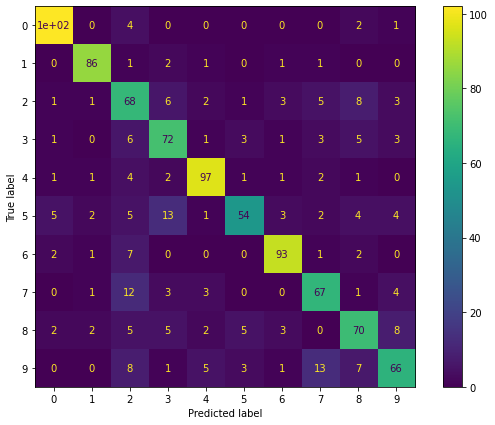

In [ ]:
# -- evaluate performance metrics
plot_confusion_matrix(dtc, feat_te, targ_te)
print(classification_report(targ_te, pred_te))

Now let's train a **Multi-layer Perceptron classifier**,

In [ ]:
# -- instantiate an MLP classifier
mlp = MLPClassifier((15))

In [ ]:
# -- train it
mlp.fit(feat_tr, targ_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

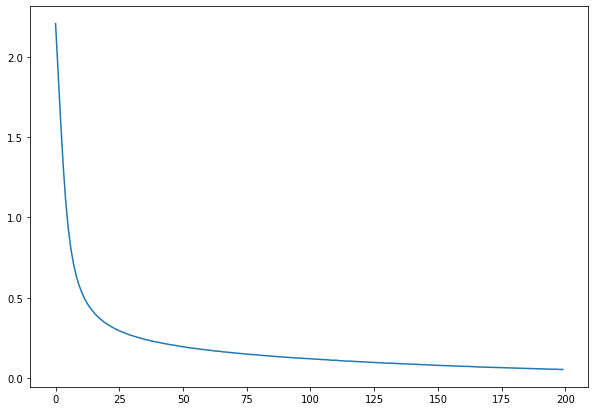

In [ ]:
# -- plot the loss function
plt.plot(mlp.loss_curve_)

In [ ]:
# -- predict
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)


In [ ]:
# -- print accuracy
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.993
testing accuracy : 0.911
